In [50]:
from fastai2.vision.all import *

In [51]:
path = untar_data(URLs.FLOWERS)
Path.BASE_PATH = path
path.ls()

(#4) [Path('valid.txt'),Path('jpg'),Path('train.txt'),Path('test.txt')]

In [84]:
path = path/'jpg/'
path

Path('jpg')

In [71]:
df_path = Path('~/Desktop/my_fastai_notebooks/Vision/data')
df = pd.read_csv(df_path/'df.csv', index_col=0)
df.head()

,name,label,class
0,jpg/image_03860.jpg,16,purple coneflower
1,jpg/image_06092.jpg,13,spear thistle
2,jpg/image_02400.jpg,42,sword lily
3,jpg/image_02852.jpg,55,bishop of llandaff
4,jpg/image_07710.jpg,96,mallow


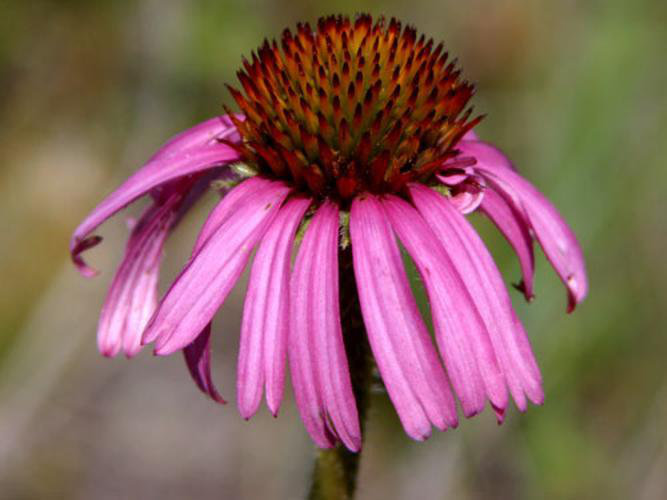

In [85]:
PILImage.create(ColReader('name', pref=path)(path/'image_03860.jpg'))

In [67]:
class Tfm(ItemTransform):
    def setups(self, items):
        self.labeller = ColReader('label')
        vals = list(map(self.labeller, items))
        self.vocab,self.o2i = uniqueify(vals, sort=True, bidir=True)

    def encodes(self, o): 
        return (PILImage.create(ColReader('name', pref=path)(o)), self.o2i[self.labeller(o)])
    def decodes(self, x): 
        return TitledImage(x[0],self.vocab[x[1]])

In [76]:
ColReader('class')(df.iloc[0])

' purple coneflower'

In [79]:
ColReader('name', pref=path)(df.iloc[0])

'/home/harish3110/.fastai/data/oxford-102-flowers/0'

In [69]:
tls = TfmdLists(df, [Resize(224), Tfm(), ToTensor()])

FileNotFoundError: [Errno 2] No such file or directory: '/home/harish3110/.fastai/data/oxford-102-flowers/0'

In [28]:
tfms = Pipeline([PetTfm(), Resize(224), FlipItem(p=1), ToTensor()])

In [15]:
tfms.setup(df)

In [16]:
tfms.vocab

(#102) [0,1,2,3,4,5,6,7,8,9...]

In [18]:
x,y = tfms(df.iloc[0])
x.shape,y

AttributeError: 'Series' object has no attribute 'read'

In [46]:
tfms = [[ColReader('name', pref=path), PILImage.create, ImageResizer(128), ToTensor(), IntToFloatTensor()],
        [labeller, Categorize()]]
dsets = Datasets(df, tfms)